# Capstone proposal by Fliuza T. 

Image based fashion product classification.

## 1) The problem

Image-based classification of apparel products using AI is becoming an important step in today's fashion industries. 
Automation of garment classification can significantly improve the effeciency in organizing the production, inventory and data management of in fashion industry, especially in the times of e-commerce thriving. 

For a few years now, I have developed a keen interest for Fashion and AI, and have been observing how the advances in Machine learning are driving innovation in the fashion industry.

Particulrly the focus of this work will be using ML models to predict the product label based on images of high-end fashion items selling on Farfetch platform, with different models for classification tasks. With this capstone project I have an opportunity not only to showcase the skills learned during the course, but also to deep-dive into the the real-life case of machine learning task. 


## 2) The data

### (a) Clear overview of your data

After researching available databases online I could not find the any dataset that could be a good 'real-life' working material for this topic. Therefore, I have decided to scrap the data directly from Farfetch website (https://www.farfetch.com/), which is the multi-brand online platform selling premium high-end fashion products. 

I have came across the publicily available API developed by one of the data science enthusiasts - shared here (https://github.com/zpencerguy/fmarket), which extracts the data on products currently listed on the websiite. 
The raw data is extracted to CSV file with around 188k rows and 23 columns containing the current listings information, such as size, brand, product image, short description, price in different currencies and discount (if applied), etc. 

As mentioned above the data comes directly from website, so it is raw and would require some formatting done before training the models. 

Here is the general data overview on the example of few rows.

- A small sample of the entries and features, values. 

(Further data representations are inlcuded in EDA part)

In [1]:
 import pandas as pd
import os
import numpy as np

# Load data
data_df1 = pd.read_csv("/content/drive/MyDrive/current_farfetch_listings.csv")
print("Data shape :" , data_df1.shape)

Data shape : (188817, 23)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_df1.head()

,Unnamed: 0,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,...,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,priceInfo.isOnSale,shortDescription,stockTotal
0,0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,...,SGD,NaN,1080,"$1,080","$1,080",1080,NaN,False,logo print strap sandals,130
1,1,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,...,SGD,20% Off,392,$392,$490,490,NaN,True,embroidered midi dress,14
2,2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,...,SGD,NaN,1245,"$1,245","$1,245",1245,NaN,False,FendiMania sock style sneakers,68
3,3,"[{'scaleId': 0, 'size': 'One Size'}]",49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,...,SGD,20% Off,308,$308,$385,385,NaN,True,top zip wallet,1
4,4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,...,SGD,NaN,1248,"$1,248","$1,248",1248,NaN,False,slingback 65 pumps,78


 #### a) Data insights 
 - There is a total of 188817 rows and 23 columns.
 - Among the key data features are the product brand, links to the product image on the white backgorund and on the model, product price, discount applied, short description and the stock total.
 - The 'shortDescription' column contains the information on multiple product aspects, which could be potentially further extracted to the additional features after necessary text analytics, such as product label and additional unique features. The details on data  
 - Product price is varying between 2 and 89724 dollars.
 - The number of brands presented in data is 2336, with different count of items listed for each one of them.
 - The images are presented in two columns: image.Cutout, with product alone on the white background, and image.model, with product on the model along with other matching items to demonstrate the styling. 
 - According to EDA, there are at least 4 column containing a substantial amount of missing data (
 priceInfo.installmentsLabel,        merchandiseLabel,                  priceInfo.discountLabel,availableSizes
).  Despite the fact that there are large protion of data missing, those columms are not important for this project analysis. 

### b) Plan to manage and process the data

- Managing your data ex. storing, file formats, database usage

Despite that the original CSV file is not that heavy, loading all of the images form URL's would be a difficult task for the machine and perhaps, not possible to manage. Therefore, I'd make a selection of 7000 images and download them to machine to store in zip format. Once done, there should be no issues loading the files form zip. 

Further in the analysis the plan is also to convert images to numpy array and high level featues for quick loding to the EDA and model training. 

 - Data cleaning and data manipulation
 
The column 'shortDescription' containing the info about the product, will be further used for identifying the label of the product. So it would require some text analytics and manipulation to be performed. It should be cleaned from uncessary chacarters and punctuations if there are any, converted to lower cases etc., as further one this will be used for feature-engineering of product labels.

Only the cutout images and labels extracted, as per above, will be used for ML task. 

Additional data management should be done for the rest of the columns that will not be related to ML task, like price and brands analytics, to understand the data and to showcase the EDA and cleaning techniques learned during the course. 

  
- Feature engineering

As mentioned above, for the machine learning task of this project, the new features should be created to get the labels of the product for classification task. After data cleaning and preparation of column 'shortDescription', the word that is related to product label should be extracted as new column. 
Moreover, to ease the navigation around the product labels, I plan to group those labels in to more general groups like 'clothes', 'shoes', 'accessories'. 

Given that only 7000 images will be selected for model training, it is important to limit the amount of labels to a certain number, as having too many labels and too little amount of images per each class, may result in poor model perfromance as it would not have enough data for supervised learning. Therefore, it is crucial to limit the number of labels used for training and having the equal count of images for each of them to make sure there will be no class imbalance issue. 



The overall plan to split EDA into the following parts:

- first do the basic-prelimenary EDA required for discovering the data and the general tendencies.
- secondly, perfrom the EDA on image data to explore the details relevant to ML task
- peform the EDA on features that are not relevant to ML task, and that would be useful for further analysis



## 3) Exploratory data analysis (EDA) and data cleaning

### a) Preliminary EDA

In [4]:
data_df1.describe()

,Unnamed: 0,brand.id,id,merchantId,priceInfo.finalPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,stockTotal
count,188817.000000,1.888170e+05,1.888170e+05,188817.000000,188817.000000,188817.000000,0.0,188817.000000
mean,89.498594,1.227366e+06,1.354713e+07,10091.138753,1079.983513,1230.788859,NaN,27.833055
std,51.960075,2.194786e+06,6.310952e+05,838.257401,1910.217119,1984.018813,NaN,464.593973
min,0.000000,6.000000e+00,1.004756e+07,9003.000000,2.000000,2.000000,NaN,0.000000
25%,44.000000,1.828600e+04,1.337835e+07,9449.000000,303.000000,378.000000,NaN,1.000000
50%,89.000000,1.184510e+05,1.370027e+07,9843.000000,612.000000,730.000000,NaN,4.000000
75%,134.000000,1.175963e+06,1.397942e+07,10600.000000,1163.000000,1360.000000,NaN,10.000000
max,179.000000,1.094619e+07,1.429129e+07,12418.000000,89724.000000,89724.000000,NaN,16987.000000


 - Number of features and samples

In [5]:
columns = data_df1.columns.tolist()
column_table = pd.DataFrame(columns=['Feature','Values'])

for column in columns:
    line = pd.DataFrame(data=[[column,data_df1[column].nunique()]],columns=['Feature','Values'])
    column_table = column_table.append(line,ignore_index=True)
    
column_table.set_index('Feature', inplace=True)
column_table

,Values
Feature,
Unnamed: 0,180
availableSizes,393
brand.id,2320
brand.name,2336
gender,2
hasSimilarProducts,2
id,187616
images.cutOut,187620
images.model,187620


 - Quality of the data: missing, incorrect values, data completeness

In [6]:
data_df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188817 entries, 0 to 188816
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       188817 non-null  int64  
 1   availableSizes                   162711 non-null  object 
 2   brand.id                         188817 non-null  int64  
 3   brand.name                       188817 non-null  object 
 4   gender                           188817 non-null  object 
 5   hasSimilarProducts               188817 non-null  bool   
 6   id                               188817 non-null  int64  
 7   images.cutOut                    188817 non-null  object 
 8   images.model                     188817 non-null  object 
 9   isCustomizable                   188817 non-null  bool   
 10  merchandiseLabel                 56441 non-null   object 
 11  merchandiseLabelField            188817 non-null  object 
 12  me

In [7]:
data_df1.isna().sum().sort_values(ascending=False)

priceInfo.installmentsLabel        188817
merchandiseLabel                   132376
priceInfo.discountLabel            120530
availableSizes                      26106
Unnamed: 0                              0
priceInfo.currencyCode                  0
shortDescription                        0
priceInfo.isOnSale                      0
priceInfo.initialPrice                  0
priceInfo.formattedInitialPrice         0
priceInfo.formattedFinalPrice           0
priceInfo.finalPrice                    0
merchandiseLabelField                   0
merchantId                              0
isCustomizable                          0
images.model                            0
images.cutOut                           0
id                                      0
hasSimilarProducts                      0
gender                                  0
brand.name                              0
brand.id                                0
stockTotal                              0
dtype: int64

The data is missing in the columns that are not relevant for this analysis, hence they can be dropped out. 
As for the relevant columns such as the image link 'images.cutOut', there are no missing values, but the quality of 'shortDescription' columns should be questioned as it is to be used for labeling. 

In [8]:
# Remove irrelevant columns with missing values

data_df=data_df1.drop(['priceInfo.installmentsLabel','Unnamed: 0', 'priceInfo.installmentsLabel','availableSizes','merchandiseLabel'], axis = 1)

In [9]:
# top 25 brands

data_df.groupby(['brand.name']).size().sort_values(ascending=False).head(25)

brand.name
Chanel Pre-Owned        2605
Prada                   2522
Gucci                   2501
Saint Laurent           2490
Dolce & Gabbana         2340
Marni                   1925
Valentino               1743
Fendi                   1738
Burberry                1671
Jimmy Choo              1546
MSGM                    1531
Stella McCartney        1524
Michael Michael Kors    1484
Emilio Pucci            1465
Alexander McQueen       1360
Miu Miu                 1324
Dsquared2               1279
P.A.R.O.S.H.            1206
Chloé                   1180
Mm6 Maison Margiela     1167
Etro                    1143
Red Valentino           1091
Bottega Veneta          1081
Brunello Cucinelli      1079
Givenchy                1040
dtype: int64

- Image overview - plot few items from each column (product alone and on model)

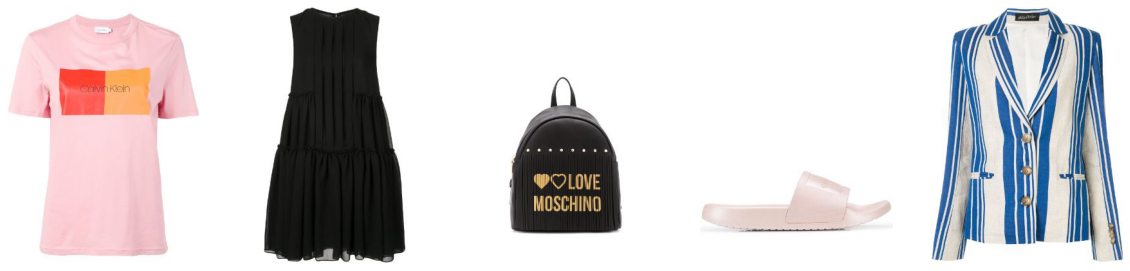

In [10]:
# Define 5 random images

import skimage.io
from matplotlib import pyplot as plt
%matplotlib inline

img_cutout=data_df1['images.cutOut']
img5=np.array(img_cutout.sample(n=5))

# Plot 5 random images from data set

fig, axs = plt.subplots(1,5,figsize=(20,5))
#axs = axs.flatten()

for i in range(5):
  img = img5[i]
  image_numpy = skimage.io.imread(img)
  axs[i].axis('off')
  axs[i].imshow(image_numpy)
plt.show()

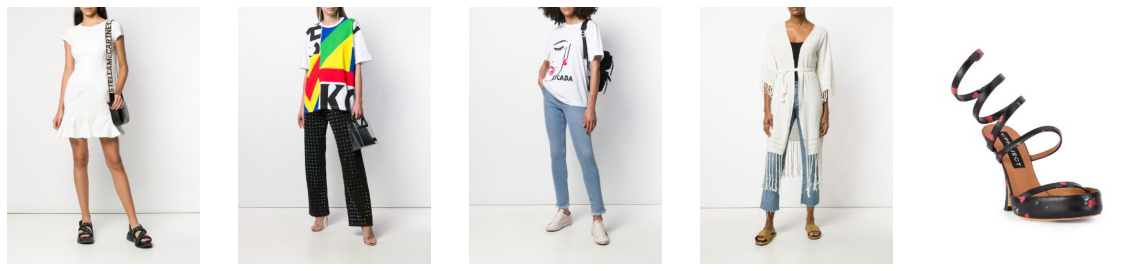

In [11]:
# Define 5 random images

img_cutout=data_df1['images.model']
img5=np.array(img_cutout.sample(n=5))

# Plot 5 random images from data set

fig, axs = plt.subplots(1,5,figsize=(20,5))
#axs = axs.flatten()

for i in range(5):
  img = img5[i]
  image_numpy = skimage.io.imread(img)
  axs[i].axis('off')
  axs[i].imshow(image_numpy)
plt.show()

The images with product displayed on model would be diffcult to classify to particular label, given that there are multiple products presented. Therefore, only cutout image will be used in this project.

- Key feature focus: 'shortDescription' column analytics and feature engineering.

The key columns that will be used in the analysis are short description of the product and images. Let's look at the data captured in those columns and plot few images that are cutout on the white background. 

In [12]:
data_df['shortDescription'].head(25)

0                       logo print strap sandals 
1                          embroidered midi dress
2                  FendiMania sock style sneakers
3                                  top zip wallet
4                              slingback 65 pumps
5                        Love Bag shoulder wallet
6     Green Dionysus GG small velvet shoulder bag
7                              logo print satchel
8                     GG Marmont Matelasse wallet
9                    Blake herringbone midi dress
10                      Snapshot small camera bag
11                 pussy-bow rose-jacquard blouse
12          Fleming distressed chevron camera bag
13                             pleated midi dress
14                                       Tess bag
15                 Margrette 50mm cow print pumps
16                              Fortezza tote bag
17                        clear mini shoulder bag
18                tie-neck houndstooth midi-dress
19                                 A4 Eye clutch 


In [13]:
# display the samples of the column 

data_df['shortDescription'].unique()[:25]

array(['logo print strap sandals ', 'embroidered midi dress',
       'FendiMania sock style sneakers', 'top zip wallet',
       'slingback 65 pumps', 'Love Bag shoulder wallet',
       'Green Dionysus GG small velvet shoulder bag',
       'logo print satchel', 'GG Marmont Matelasse wallet',
       'Blake herringbone midi dress', 'Snapshot small camera bag',
       'pussy-bow rose-jacquard blouse',
       'Fleming distressed chevron camera bag', 'pleated midi dress',
       'Tess bag', 'Margrette 50mm cow print pumps', 'Fortezza tote bag',
       'clear mini shoulder bag', 'tie-neck houndstooth midi-dress',
       'A4 Eye clutch ', 'heart print scarf', 'Olimpia shoulder bag',
       'large Whip shoulder bag ', 'Runway small FF logo tote',
       'logo print t-shirt'], dtype=object)

From the data overview it looks like the product label is last word of the description. Let's try to substruct it into new column and group by to check on the results. 

In [14]:
# split the description and substract the last word of a string
data_df["label"] = data_df['shortDescription'].str.split().str[-1]

# convert all strings to lower cases
data_df["label"] = data_df["label"].str.lower()

# remove special characters
data_df["label"] = data_df["label"].str.replace('[^\w\s-]', '',regex=True)

data_df["label"].head()

0     sandals
1       dress
2    sneakers
3      wallet
4       pumps
Name: label, dtype: object

Get the count of words in each row for description column to verify if the longest strings have labels as the last word.

In [15]:
data_df['token_count'] = data_df.shortDescription.str.replace(',','').str.split().str.len()
data_df.filter(['shortDescription','token_count']).head(10).sort_values(by=['token_count'],ascending=False)

,shortDescription,token_count
6,Green Dionysus GG small velvet shoulder bag,7
0,logo print strap sandals,4
2,FendiMania sock style sneakers,4
5,Love Bag shoulder wallet,4
8,GG Marmont Matelasse wallet,4
9,Blake herringbone midi dress,4
1,embroidered midi dress,3
3,top zip wallet,3
4,slingback 65 pumps,3
7,logo print satchel,3


In [16]:
# get number of rows with for each count

data_df.groupby(["token_count"]).size()

token_count
1       243
2     39526
3     88318
4     41754
5     10764
6      4329
7      2144
8       991
9       406
10      202
11       68
12       33
13       17
14       10
15        4
16        4
17        4
dtype: int64

In [17]:
# display descriptions with longest string

pd.set_option('display.max_colwidth', None)

data_df[['shortDescription',"label",'token_count']].sort_values(by=['token_count'],ascending=False).head(20)

,shortDescription,label,token_count
175095,Open Toe Shaped Platform Heel (15 Cm) With Bow Strap In Pebble Lucido Leather & Calf Leather,leather,17
176783,"Downfill Ski Jacket With 4-Bar Stripe & Removable Hood In Red, White And Blue Matte Nylon Poplin",poplin,17
173119,"Single Breasted Sack Overcoat With Intarsia Red, White And Blue Stripe In Dyed Long Hair Mink Fur",fur,17
147446,"Adwoa Aboah 18kt Yellow Gold, Hematite, Sterling Silver, Pink Tourmaline And Rubellite Cape Chain & Stone Necklace",necklace,17
175106,"Mesh Stitch V-neck Cardigan With Float Stitch Red, White And Blue Cricket Stripe In Cotton Crepe",crepe,16
173125,"Relaxed Fit Short Sleeve Polo With Center Back Red, White And Blue Stripe In Classic Pique",pique,16
173123,"Relaxed Fit Short Sleeve Polo With Center Back Red, White And Blue Stripe In Classic Pique",pique,16
175108,Classic Long Sleeve Button Down Point Collar Thigh Length Shirtdress With Jewelry Applique In Solid Poplin,poplin,16
59001,Diamond Foundry x Dover Street Market 18kt white and 18kt yellow gold Piercing Stud earring,earring,15
59003,Diamond Foundry x Dover Street Market 18kt white and 18kt yellow gold Piercing diamond bangle,bangle,15


In [18]:
# check the labels of descriptions with more than 5 words included

df_x = data_df.loc[(data_df['token_count'] >= 5)]
labels_x = df_x.groupby(["label"]).size().reset_index(name="count")
labels_x.sort_values(by=['count'],ascending=False).head(20)

,label,count
51,bag,2896
196,dress,1469
204,earrings,896
588,sneakers,750
526,ring,732
429,necklace,680
650,top,590
97,bracelet,521
203,earring,474
571,skirt,438


To make sure that each last word of description is indeed the product label, let's group them and see all labels in wordcload as well.

(-0.5, 2999.5, 1999.5, -0.5)

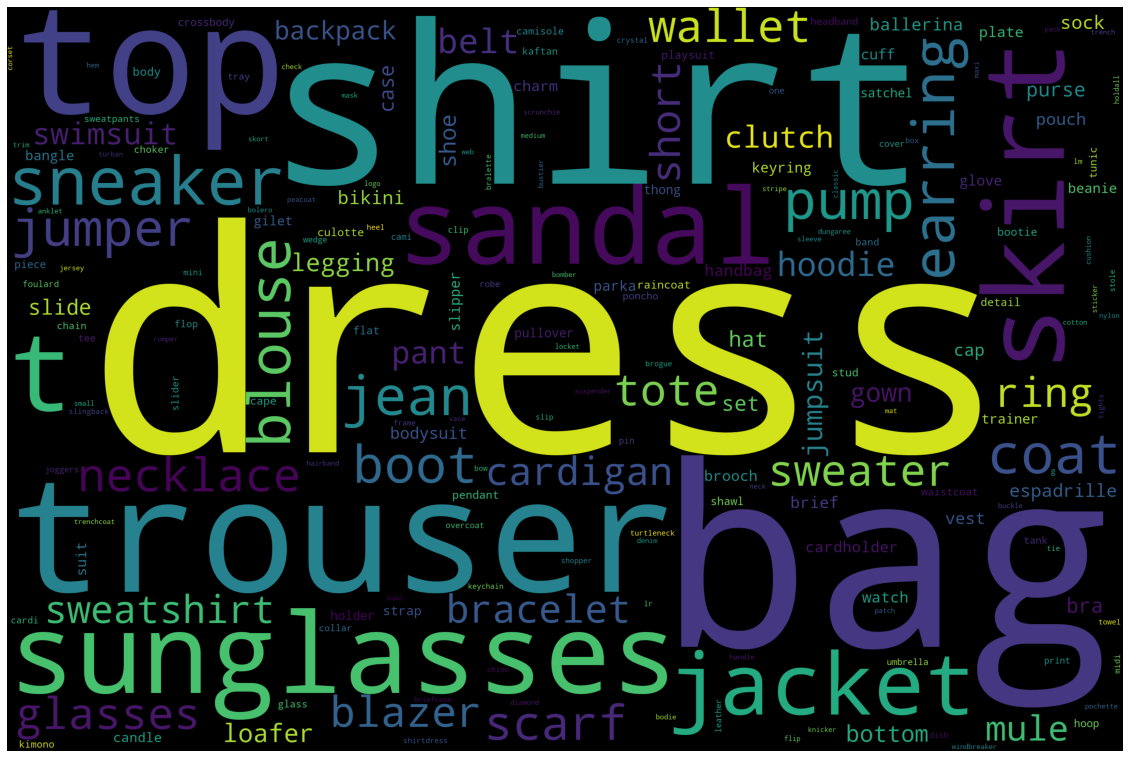

In [19]:
# display the contents of 'short.description' column in wordcloud

from wordcloud import WordCloud

key_words = WordCloud(width=3000, height=2000, collocations=False).generate(' '.join(data_df['label'].astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(key_words)
plt.axis('off')

In [20]:
#from collections import Counter

# Initialize a counter object
#records = Counter()

# Count words in "strings" column, row by row
#for string in data_df["shortDescription"].values:
 #   records.update(string.split(" "))

#print(records.most_common(10))

In [21]:
# top labels

labels = data_df.groupby(["label"]).size().reset_index(name="count")
labels.sort_values(by=['count'],ascending=False)

,label,count
496,dress,19000
161,bag,15561
1550,trousers,9302
1513,top,8296
1425,sunglasses,7149
...,...,...
779,jumpuit,1
780,jumsuit,1
782,juumper,1
783,jаcket,1


In [22]:
labels = data_df.groupby(["label"]).size().reset_index(name="count")
labels.sort_values(by=['count']).head(20)

,label,count
833,legging-shorts,1
911,lr-1003,1
912,lr-1004,1
913,lr-1005d,1
914,lr-1014d,1
916,lucy,1
921,m02,1
922,m91700,1
923,m93998,1
924,mac,1


In [23]:
# display labels with lower count

labels.sort_values(by=['count'],ascending=True).head(20)

,label,count
833,legging-shorts,1
911,lr-1003,1
912,lr-1004,1
913,lr-1005d,1
914,lr-1014d,1
916,lucy,1
921,m02,1
922,m91700,1
923,m93998,1
924,mac,1


In [24]:
# get the total count of class labels

labels.shape[0]

1667

By looking at labels with lowest count, the names are quite uncommon. Let's plot the item distribution for the top 50 labels.

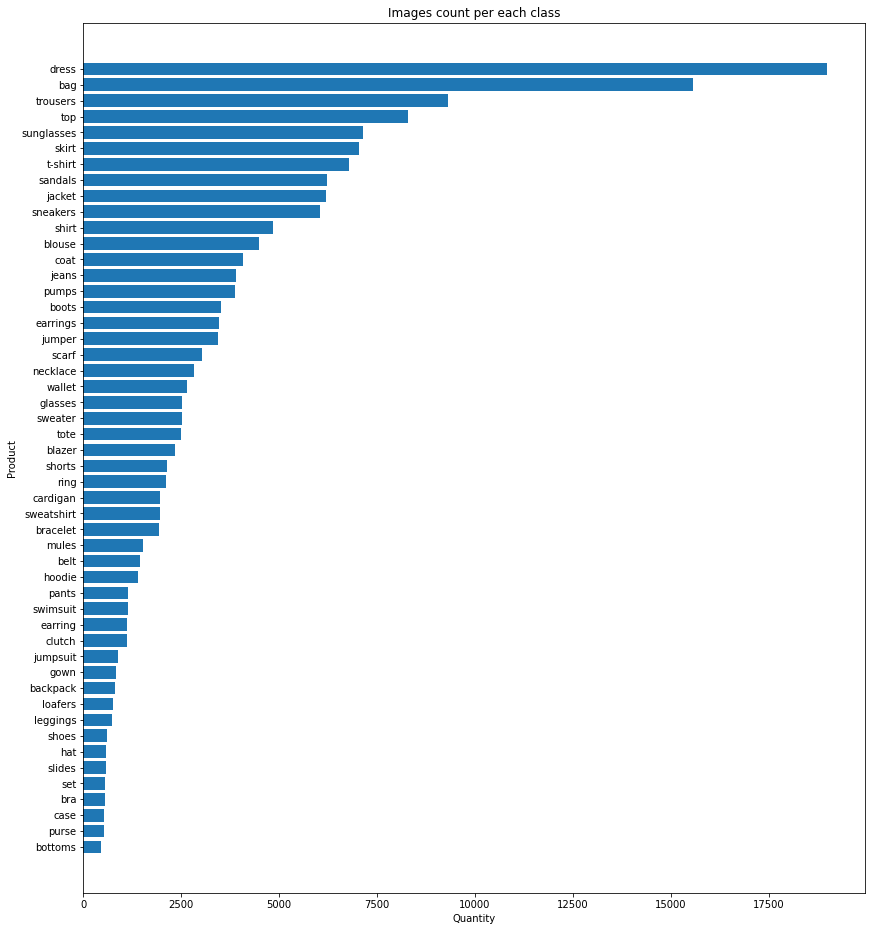

In [25]:
# plot top product labels

labels = labels.sort_values(by=['count'],ascending=False).head(50)
labels.sort_values('count',inplace=True)

plt.figure(figsize=(14,16))
plt.barh(labels['label'],labels['count'])
plt.title('Images count per each class')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.show()

The plot 'Images count per each class' demontrates that the distribution of items per each class is not equal, this means that there is class imbalnce problem. This has to be addressed by picking the equal amount of images for each class when training the model, as imbalance in a models, such as CNN, could result in poor performance for the class with less representation, impacting model overall performance.

The above analysis also shows that there are quite many labels, and many of them have uncommon names (such as 'sweatshot, 'mascot' etc.), according to table with lowest label counts. Therefore, it would be helpful to limit the number of classes to only most common label names with biggest counts. 

Let's pick only the ones that have more than 1000 items in count. 

In [26]:
# limit product label amount 

labels = data_df.groupby(["label"]).size().sort_values(ascending=False).pipe(lambda  dfx: dfx.loc[dfx>1000])
labels = labels.reset_index(level=0)
list_label = labels['label'].tolist()
filter = data_df["label"].isin(list_label)

data_df = data_df[filter]
print(data_df.shape)

lbsl = data_df.groupby(["label"]).size().sort_values(ascending=False)
lbl_shape = lbsl.shape[0]
print ("Count of class labels: ", lbl_shape)

(160523, 21)
Count of class labels:  37


The number of class labels has decreased significantly. However, it still would be usefl to group them into more general category, such as 'clothes', 'shoes', 'accessories'. 

In [27]:
# manually define product category based on the label

filters = [
   (data_df["label"].isin(["dress", "trousers", "top",'skirt', 'jacket', "jeans","sweatshirt", "t-shirt", "shirt", "sweater","blouse", "coat", "jumper", "coat", "cardigan","blazer","shorts","hoodie","pants","swimsuit" ])), 
   (data_df["label"].isin(["sandals", "sneakers", "pumps", "boots",'mules',"shoes"])),
   (data_df["label"].isin(["bag", "tote", "ring", "bracelet", "belt",'earring',"clutch","glasses","sunglasses","earrings","wallet","scarf","necklace"]))
   ]
values = ["clothes", "shoes", "accessories"]

# apply filter with select value and check the result

data_df['product_category'] = np.select(filters, values, default="other")

data_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,...,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal,label,token_count,product_category
0,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41/54/50/13415450_17798955_300.jpg,https://cdn-images.farfetch-contents.com/13/41/54/50/13415450_17798961_300.jpg,False,NoTag,9359,...,1080,"$1,080","$1,080",1080,False,logo print strap sandals,130,sandals,4,shoes
1,2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78/45/66/13784566_17127306_300.jpg,https://cdn-images.farfetch-contents.com/13/78/45/66/13784566_17127308_300.jpg,False,NoTag,9319,...,392,$392,$490,490,True,embroidered midi dress,14,dress,3,clothes
2,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37/74/41/13377441_15308565_300.jpg,https://cdn-images.farfetch-contents.com/13/37/74/41/13377441_15308566_300.jpg,False,NoTag,9140,...,1245,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68,sneakers,4,shoes
3,49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74/40/82/13744082_16970243_300.jpg,https://cdn-images.farfetch-contents.com/13/74/40/82/13744082_16970244_300.jpg,False,NoTag,9031,...,308,$308,$385,385,True,top zip wallet,1,wallet,3,accessories
4,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66/82/56/13668256_16606024_300.jpg,https://cdn-images.farfetch-contents.com/13/66/82/56/13668256_16606027_300.jpg,False,NoTag,9339,...,1248,"$1,248","$1,248",1248,False,slingback 65 pumps,78,pumps,3,shoes


### b) Task-specific EDA

- Dealing with class imbalance and sample selection

In [28]:
# overview of class labels per each category

labels = data_df.groupby(["product_category","label"]).size().head(50)
print(labels)

product_category  label     
accessories       bag           15561
                  belt           1434
                  bracelet       1924
                  clutch         1123
                  earring        1124
                  earrings       3449
                  glasses        2520
                  necklace       2835
                  ring           2110
                  scarf          3032
                  sunglasses     7149
                  tote           2492
                  wallet         2645
clothes           blazer         2332
                  blouse         4493
                  cardigan       1966
                  coat           4076
                  dress         19000
                  hoodie         1381
                  jacket         6206
                  jeans          3896
                  jumper         3434
                  pants          1139
                  shirt          4850
                  shorts         2143
                  ski

As mentioned above, the class imbalance problem should be addressed. However, given that the image loading cannot be done for all images, the number of samples is decided to limit to 7000 only. For effective model training let's limit the classes to 7, so that there would be 1000 images per each one of them: 2 classes from 'Shoes' and 'Accessories', and 3 from 'Clothes' category.

In [29]:
# choose 7 classes 

test = data_df[data_df['label'].isin(["sneakers","boots","dress", "jacket", "pants", "bag","glasses"])]

test['label'].value_counts()

dress       19000
bag         15561
jacket       6206
sneakers     6040
boots        3519
glasses      2520
pants        1139
Name: label, dtype: int64

In [30]:
# euqally distribute the number of samples per each class

class_labels = test['label'].unique().tolist()
df_7k = pd.DataFrame([])

for lbl in class_labels:
    # Select 1000 rows from each class
    df_7k = df_7k.append(test[test['label']==lbl].sample(n=1000,axis=0,random_state=1))

# verify the result    
df_7k['label'].value_counts()

dress       1000
sneakers    1000
bag         1000
boots       1000
glasses     1000
jacket      1000
pants       1000
Name: label, dtype: int64

- Train/test/validation split

In [31]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, valid_df = train_test_split(
    df_7k, test_size=0.25, random_state=1
)

train_df, test_df = train_test_split(
        train_df, test_size=0.20, random_state=1
        ) #

print("Train DataFrame:", train_df.shape)
print("Valid DataFrame:", valid_df.shape)
print("Test DataFrame:", test_df.shape)

Train DataFrame: (4200, 22)
Valid DataFrame: (1750, 22)
Test DataFrame: (1050, 22)


In [32]:
# save to csv files

train_df.to_csv('train_df.csv', index=False)
valid_df.to_csv('valid_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

- Basic Image data EDA

For this part the images should be already loaded from URL's. 

The exact steps for loading images from CSV file URL's, converting them to numpy arrays and extracting high level features are in different workbook named 'Image loading and feature extraction'.



For the sake of image EDA let's load raw images to show few samples with labels assigned to them.

In [33]:
#from google.colab import drive
#drive.mount('/content/drive')

 *Note : due to the file size limitation in github, the image data of train/test/valid sets is split into multiple files for loading, instead of having nicely zipped in one file*

In [34]:
# load raw images

from zipfile import ZipFile

# indicate zipfile location to extract all images

#with ZipFile("/content/drive/MyDrive/farfetch_images.zip", "r") as zip:  
 #   zip.extractall()

path = "/content/drive/MyDrive/"
 
with ZipFile( path +"test.zip", "r") as zip:  
    zip.extractall()

with ZipFile( path +"valid.zip", "r") as zip:  
    zip.extractall()    

with ZipFile(path +"train-1.zip", "r") as zip:  
    zip.extractall()

with ZipFile(path +"train.zip", "r") as zip:  
    zip.extractall()

# run this line if the train comes as 'train-2'
if not os.path.exists(r"train"):
    os.rename("train-2","train")


# Merge train-1 and train

import subprocess as sbp
import os
import shutil

path= 'train-1'
fol = os.listdir(path)
p2 = 'train'

for i in fol:
    p1 = os.path.join(path,i)
    p3 = 'cp -r ' + p1 +' ' + p2+'/.'
    sbp.Popen(p3,shell=True)


#remove train-1 folder
shutil.rmtree('train-1')
#shutil.rmtree('train-2')

# create Image folder
#newpath = r'images' 
#if not os.path.exists(newpath):
 #   os.makedirs(newpath)


# move train/test/valid to 'images'
#shutil.move("test", "images/test")
#shutil.move("valid", "images/valid")
#shutil.move("train-2", "images/train")    

Plot few images per each label

['dress' 'sneakers' 'pants' 'jacket' 'bag' 'boots' 'glasses']
Product labels: dress


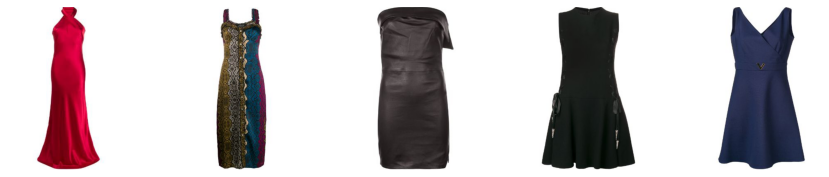

Product labels: sneakers


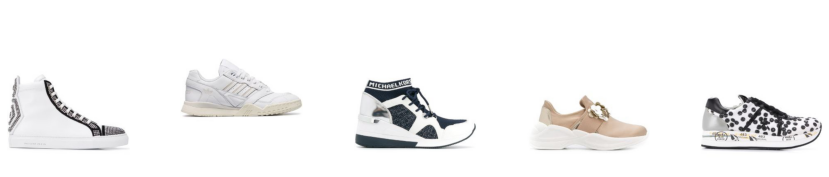

Product labels: pants


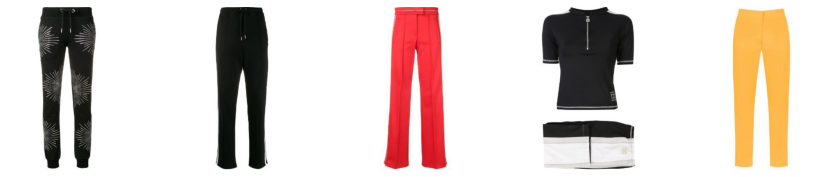

Product labels: jacket


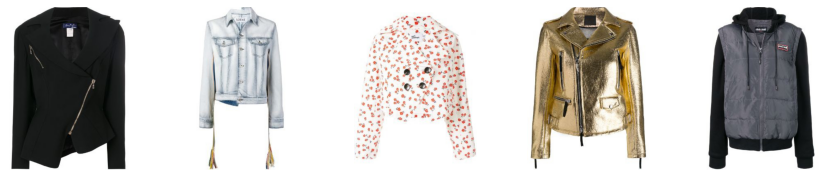

Product labels: bag


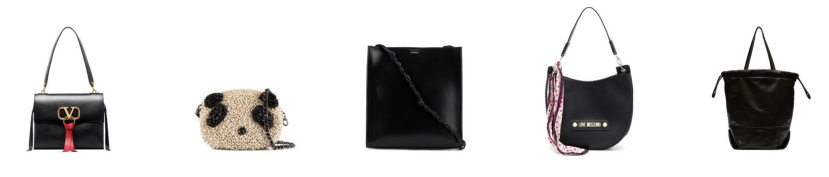

Product labels: boots


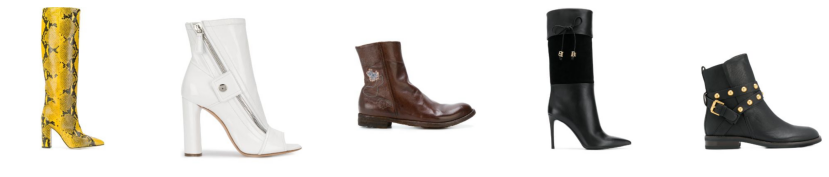

Product labels: glasses


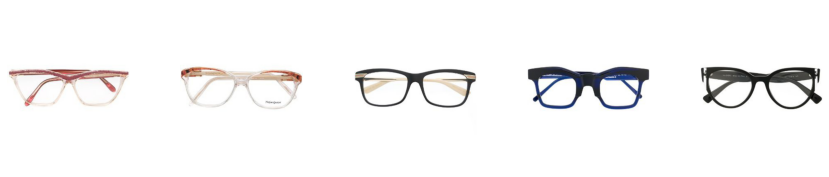

In [35]:
# plot few images for each label class

from PIL import Image

class_labels = train_df.label.unique()
print(class_labels)

for classes in class_labels:
    print('Product labels:', classes)
    
    # Make subplot
    fig, ax = plt.subplots(1,5,figsize=(15,3))
    
    for i in np.arange(5):
        # Load the image using pillow
        pillow_img = Image.open(os.path.join('train',classes,os.listdir(os.path.join('train',classes))[i]))
        
        # Convert into np array
        img = np.array(pillow_img)
        
        # Plot
        ax[i].imshow(img)
        ax[i].axis('off')
        
    plt.show()

Get the unique shape/pixes (width,height,channels) of all images in the trainset and open sample image to get the datatype and min/max values

In [36]:
import cv2
from PIL import Image

dataset_folder = "train"

folders = os.listdir(dataset_folder)
images = []
image_shapes = []
for folder in folders:
  folder_path = os.path.join(dataset_folder, folder)
  for path in os.listdir(folder_path):
    image_path = os.path.join(os.path.join(dataset_folder, folder), path)
    image = cv2.imread(image_path)
    
    # Convert to RGB as OpenCV uses BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    images.append(image)
    
    # Obtain shape of each image and store them in an array
    (width, height) = image.shape[1], image.shape[0]
    image_shapes.append((width, height))
    
# Return only unique shapes
unique_shapes = list(set(image_shapes))
print ("unique_shapes", unique_shapes)


# Load the image
pillow_img = Image.open('/content/train/bag/bag10.jpg')

# Convert it into a Numpy array
img = np.array(pillow_img)

# Print shape
#print('Shape:', img.shape) 
print('Sample image data type:', img.dtype) 


unique_shapes [(300, 401), (300, 400)]
Sample image data type: uint8


The size of all the images is around (300,400) in height and 
width.

The images should be resized to single size for further analysis and vizulaizations. Let's set 300,400 for all.


In [37]:
# resize images

dataset_folder = "train"

folders = os.listdir(dataset_folder)
def resize_sets(dataset_folder):
  for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    for path in os.listdir(folder_path):
      image_path = os.path.join(os.path.join(dataset_folder, folder), path)
      im = Image.open(image_path)
      f, e = os.path.splitext(image_path)
      imResize = im.resize((300, 400), Image.ANTIALIAS)
      imResize.save(f + '.jpg', 'JPEG', quality=90)


# resize sets:

resize_sets("train")
resize_sets("test")
resize_sets("valid")

print ("Completed")

Completed


Get the 'average' image per each class, by extracting the numpy array and approximate the data with Image.blend function.



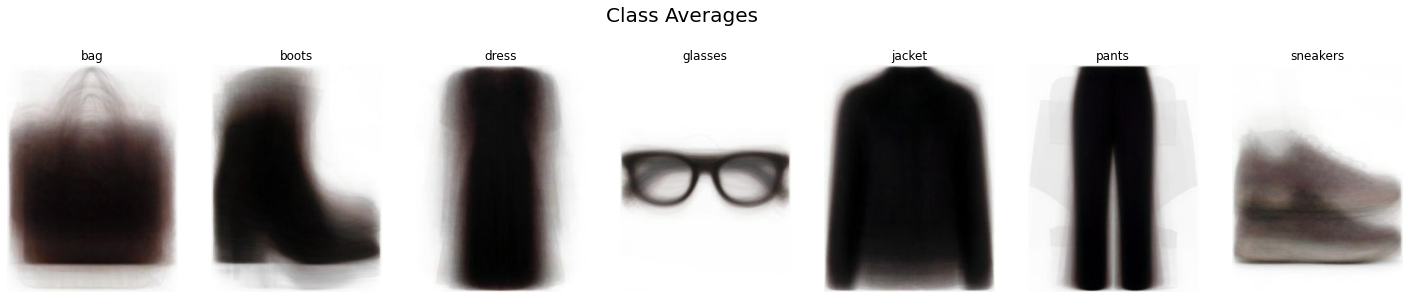

In [38]:
# get all images names
path = '/content/train/boots/'

def get_avg(path):
  allfiles=os.listdir(path)
  # get dimensions of first image
  w,h = Image.open(path + allfiles[0]).size
  N = len(allfiles)
  avg=Image.open(path + allfiles[0])
  for i in range(1,N):
    img=Image.open(path + allfiles[i])
    avg=Image.blend(avg,img,1.0/float(i+1))

  return(avg)


# save average image per class

classes = os.listdir('train')

for cls in classes:
  avg = get_avg('/content/train/' + cls +'/')
  avg.save(cls + "Blend.jpg")


# read images

img1 = np.array(Image.open("/content/bagBlend.jpg"))
img2= np.array(Image.open("/content/bootsBlend.jpg"))
img3 = np.array(Image.open("/content/dressBlend.jpg"))
img4 = np.array(Image.open("/content/glassesBlend.jpg"))
img5 = np.array(Image.open("/content/jacketBlend.jpg"))
img6 = np.array(Image.open("/content/pantsBlend.jpg"))
img7 = np.array(Image.open("/content/sneakersBlend.jpg"))

# display images
fig, ax = plt.subplots(1,7,figsize=(25,5))
plt.suptitle('Class Averages', fontsize=20)

ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title("bag")

ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title("boots")

ax[2].imshow(img3)
ax[2].axis('off')
ax[2].set_title("dress")

ax[3].imshow(img4)
ax[3].axis('off')
ax[3].set_title("glasses")

ax[4].imshow(img5)
ax[4].axis('off')
ax[4].set_title("jacket")

ax[5].imshow(img6)
ax[5].axis('off')
ax[5].set_title("pants")

ax[6].imshow(img7)
ax[6].axis('off')
ax[6].set_title("sneakers")

plt.show()

Analyse the RGB color distribution for each class in the trainset

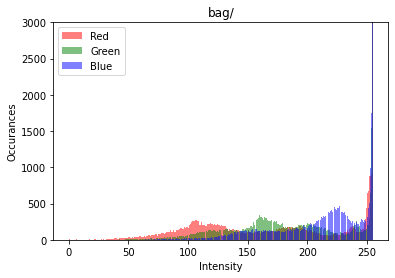

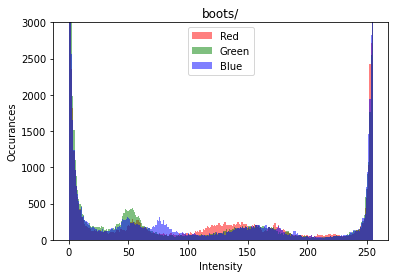

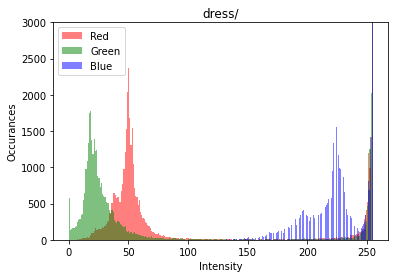

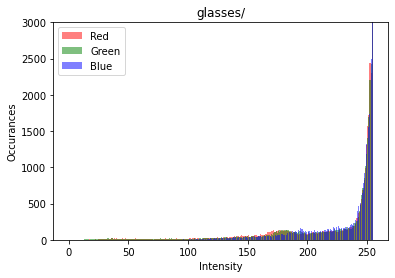

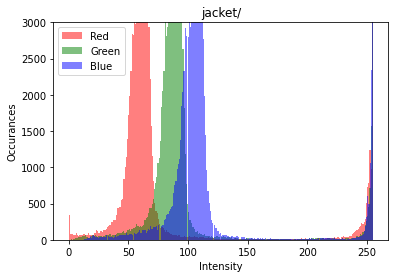

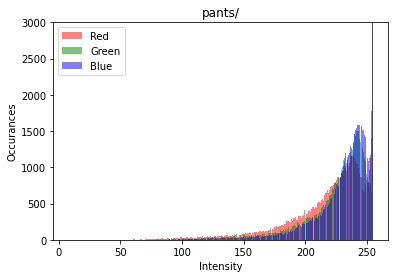

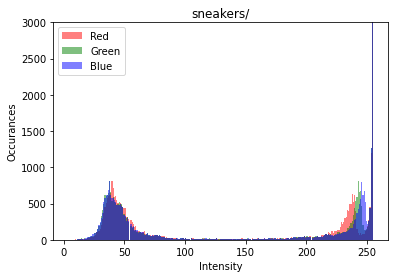

In [39]:
# plot RGB intensity plot for each class in train data 
import cv2
# extracted train data location on local drive
train_file='train/'
class_directions = ['bag/','boots/','dress/','glasses/','jacket/','pants/','sneakers/']


for class_dir in class_directions: 

  # use the raw image class file location
  path = train_file + class_dir
  for image in os.listdir(path):  
    if image.endswith('.jpg'):
      img = cv2.imread(path+image)

      #_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
  _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5) 
  _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
  _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
  _ = plt.xlabel('Intensity')
  _ = plt.ylabel('Occurances')
  _ = plt.legend([ 'Red', 'Green', 'Blue'])
  plt.title(class_dir)
  plt.ylim(0, 3000)

  plt.show()

Display the total number of images after loading

In [40]:
# load number of images in trainset

subset_dir = ['train', 'valid', 'test']


for subset in subset_dir:
  print(" ")
  subset_folder = os.listdir('/content/' + subset)
  for class_names in subset_folder:
    class_path = os.path.join('/content/' + subset, class_names)
    images_in_class = os.listdir(class_path)

    print("Number of Samples in", subset , class_names, "class", ":", len(images_in_class))
  print(" ")

 
Number of Samples in train sneakers class : 587
Number of Samples in train glasses class : 567
Number of Samples in train jacket class : 587
Number of Samples in train dress class : 523
Number of Samples in train boots class : 608
Number of Samples in train bag class : 605
Number of Samples in train pants class : 624
 
 
Number of Samples in valid sneakers class : 252
Number of Samples in valid glasses class : 257
Number of Samples in valid jacket class : 250
Number of Samples in valid dress class : 221
Number of Samples in valid boots class : 269
Number of Samples in valid bag class : 259
Number of Samples in valid pants class : 242
 
 
Number of Samples in test sneakers class : 161
Number of Samples in test glasses class : 176
Number of Samples in test jacket class : 163
Number of Samples in test dress class : 157
Number of Samples in test boots class : 123
Number of Samples in test bag class : 136
Number of Samples in test pants class : 134
 


- Basic Image prepocessing. 

(part of it has been already done when resizing the image to the same dimensions)

Now the pixel values should be rescaled from range 0-255 to the range 0-1, as it is required for more efficient and faster model training, especially for Deep Neural networks.

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True,rotation_range=5)
test_generator = ImageDataGenerator(rescale=1./255)

In [45]:
trainset=img_generator.flow_from_directory(os.path.join("train"),batch_size=100,target_size=(300, 400),class_mode="sparse",shuffle=False)
validset=img_generator.flow_from_directory(os.path.join("valid"),batch_size=100,target_size=(300, 400), class_mode="sparse", shuffle=False)
testset=test_generator.flow_from_directory(os.path.join("test"),batch_size=100,target_size=(300, 400), class_mode="sparse", shuffle=False)

Found 4101 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [46]:
batch_imgs_tr,batch_labels_tr =trainset.next()
print("Batch images train:",batch_imgs_tr.shape)
print("Batch labels train:",batch_labels_tr.shape)

batch_imgs_te,batch_labels_te =testset.next()
print("Batch images test:",batch_imgs_te.shape)
print("Batch labels test:",batch_labels_te.shape)

batch_imgs_val,batch_labels_val =validset.next()
print("Batch images validation:",batch_imgs_val.shape)
print("Batch labels validation:",batch_labels_val.shape)

Batch images train: (100, 300, 400, 3)
Batch labels train: (100,)
Batch images test: (100, 300, 400, 3)
Batch labels test: (100,)
Batch images validation: (100, 300, 400, 3)
Batch labels validation: (100,)


### с) EDA on features not used in ML task

*this part is to be done*

## 4) Machine learning 

EDA shows that the data contains quite limited but intersting information. The main features are categorical or contain text information, which is not the best case for machine learning task. This therefore required some manipulations and feature engineering to get the relevant data. Therefore, as mentioned before, for machine learning task only labels and images will be used as input data.


The machine learning question of this project would be "*To which product class does the image belong*?" --> 
The goal is to predict the classification label of listed fashion item, having its image.

Before going into ML model training, the data would have to be checked for dimensionality reduction as result of feature extraction, this should be done particualy with PCA analysis. K-means clustering can be applied as well and further checked if the clusters are alighed with classes. 
PCA can be applied to simple model training. 

For training model, high-level features will be extracted using Mobilenet_v2. 
The basic EDA on high-level features extracted is also going to implemented (feature extraction workbook)


The models planned to use for this task are:

Two Simple models: 

- Logistic regression. This model is easier to implement, interpret, and very efficient to train.

The hyperparameters planned to tune: regularization strength and, possibly, penalty with solver tuned with GridSearchCV

- Knn model. It is another simple model suitable for multiclassification as  k-data points with similar characteristics exist close to each other and follow a similar pattern.

The hyperparameters planned to tune: the number of nearest neighbors to inspect tuned with GridSearchCV.

Two neural network models:

- Multilayer Perceptrons (MLPs)
These are the most basic deep neural networks, which is composed of a series of fully connected layers. It can be used to solve complex nonlinear problems, while handling the large amounts of input data well.

- Convolutional Neural Network (CNN)
For this part I will combine convolutional and max-pool layers for effective classification. CNN is known as effective for image classifiicatition as with its dimensionality reduction feature it works well with huge number of parameters in an image.

The baseline to explain model performance will be based on Dummy Classifier from sklearn to asses if the ML model is learning or not (differnt strategies (Most frequent, Prior, Uniform, etc) can be also compared against each other for better 'baseline' performance)

The key metric for model performance evaluation and comparison will be the accuracy percentage and error rate, supported by validation curves.

Also confusion matrix, classification report and test classification will be implemented well. 